In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#!pip install scikit-optimize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Merged Datasets.csv')
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col145,col146,col147,col148,col149,col150,col151,col152,col153,class
0,5733,71028,1154534,21149286,70321,863426,13981256,1131315,13789154,20442223,...,12,8,17,10,4,17,18,2,7,1
1,26469,716432,25819310,1049819498,715064,19257171,693182107,25739532,690002375,1043915912,...,2,16,15,13,12,11,2,17,2,1
2,5025,61271,968951,17156855,58356,712477,11260297,869042,10590445,14567994,...,16,18,17,17,17,20,2,2,12,1
3,12468,236408,5882648,164649074,241245,4572804,113740236,6140133,116299688,174893343,...,6,10,11,6,13,15,6,13,13,1
4,5461,67386,1097332,20094078,66837,829574,13517914,1059655,13170084,18788259,...,9,8,6,9,9,5,6,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3337,32393,418919,6133085,31862,304573,3909251,392754,3704969,5435738,...,6,9,9,3,18,1,14,8,5,0
196,23960,586290,18895034,685207482,590223,14465760,466926554,19167811,470558718,700123149,...,8,11,13,3,16,1,9,12,10,0
197,4371,47401,677607,10924111,46004,496355,7080413,629242,6738063,9683030,...,10,14,1,10,10,3,12,4,3,0
198,1491,10290,93302,954468,9858,69297,632765,81536,573055,752886,...,13,4,10,15,14,6,8,9,3,0


In [ ]:
df=df.fillna(0)

In [ ]:
X=df.drop(['class'],axis=1)
y=df['class']
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

In [ ]:
X = MinMaxScaler().fit_transform(X)

In [ ]:
#lr_train=LogisticRegression().fit(X,y)
#y_pred_lr=lr_train.predict(X)
#clf = lr_train.fit(X, y)
#pred=np.round(clf.predict(X))
#confusion = confusion_matrix(y, pred, labels=[1, 0]).ravel()
#print(confusion)




In [ ]:
#print(metrics.accuracy_score(y, pred))


In [ ]:
#print(f"Accuracy = {metrics.accuracy_score(y, pred)}")
#print(f"Precision = {metrics.precision_score(y, pred)}")
#print(f"Recall = {metrics.recall_score(y, pred)}")

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, test_size=20, random_state=34, stratify=y)

In [ ]:
lr=LogisticRegression().fit(X_train,y_train)

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
print("Test Accuracy for LR :",metrics.accuracy_score(y_test, y_pred_lr))
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_lr)}")
print(f"Precision = {metrics.precision_score(y_test, y_pred_lr)}")
print(f"Recall = {metrics.recall_score(y_test, y_pred_lr)}")
print(f"F1_Score = {metrics.f1_score(y_test, y_pred_lr)}")

Test Accuracy for LR : 0.6
Accuracy = 0.6
Precision = 0.5833333333333334
Recall = 0.7
F1_Score = 0.6363636363636365


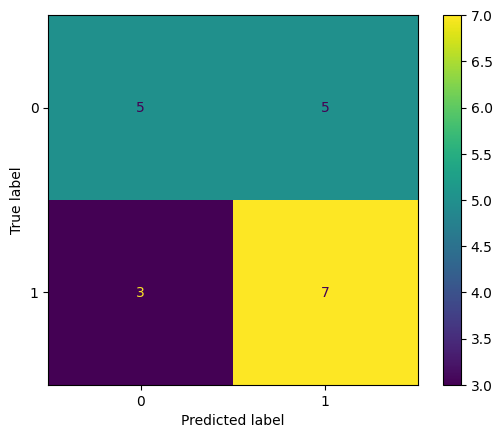

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
rf=RandomForestClassifier().fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print("Test Accuracy for RF :",metrics.accuracy_score(y_test, y_pred_rf)*100)
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_rf)}")
print(f"Precision = {metrics.precision_score(y_test, y_pred_rf)}")
print(f"Recall = {metrics.recall_score(y_test, y_pred_rf)}")
print(f"F1_Score = {metrics.f1_score(y_test, y_pred_rf)}")

Test Accuracy for RF : 50.0
Accuracy = 0.5
Precision = 0.5
Recall = 0.7
F1_Score = 0.5833333333333334


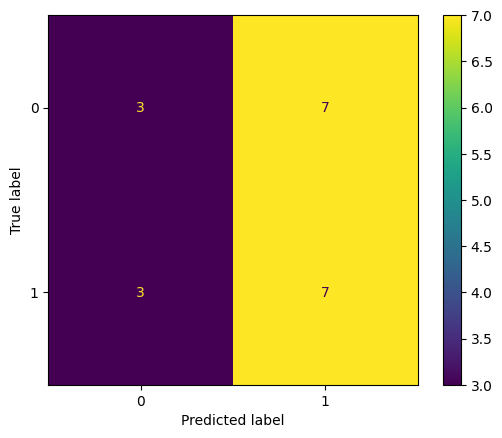

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
svc=SVC(probability=True).fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
print("Test Accuracy for SVC :",metrics.accuracy_score(y_test, y_pred_svc)*100)
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_svc)}")
print(f"Precision = {metrics.precision_score(y_test, y_pred_svc)}")
print(f"Recall = {metrics.recall_score(y_test, y_pred_svc)}")
print(f"F1_Score = {metrics.f1_score(y_test, y_pred_svc)}")

Test Accuracy for SVC : 65.0
Accuracy = 0.65
Precision = 0.6153846153846154
Recall = 0.8
F1_Score = 0.6956521739130435


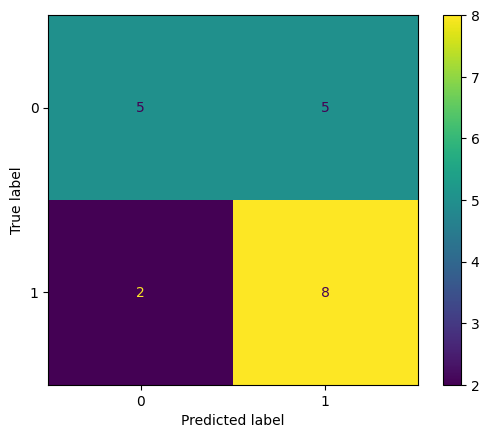

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_kn=knn.predict(X_test)
print("Test Accuracy for KNN :",metrics.accuracy_score(y_test, y_pred_kn)*100)
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_kn)}")
print(f"Precision = {metrics.precision_score(y_test, y_pred_kn)}")
print(f"Recall = {metrics.recall_score(y_test, y_pred_kn)}")
print(f"F1_Score = {metrics.f1_score(y_test, y_pred_kn)}")

Test Accuracy for KNN : 60.0
Accuracy = 0.6
Precision = 0.6
Recall = 0.6
F1_Score = 0.6


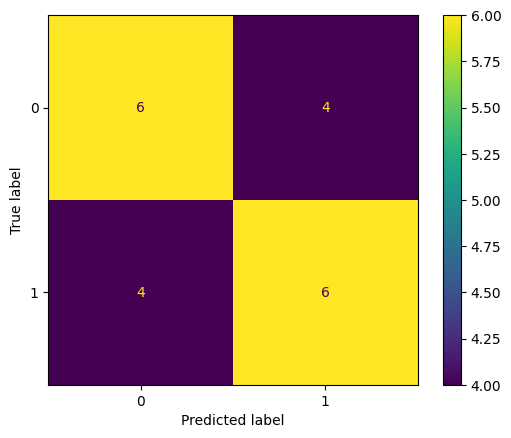

In [ ]:
cm = confusion_matrix(y_test, y_pred_kn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gdc=gdc.predict(X_test)
print("Test Accuracy for GDC :",metrics.accuracy_score(y_test, y_pred_gdc)*100)
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_gdc)}")
print(f"Precision = {metrics.precision_score(y_test, y_pred_gdc)}")
print(f"Recall = {metrics.recall_score(y_test, y_pred_gdc)}")
print(f"F1_Score = {metrics.f1_score(y_test, y_pred_gdc)}")

Test Accuracy for GDC : 45.0
Accuracy = 0.45
Precision = 0.46153846153846156
Recall = 0.6
F1_Score = 0.5217391304347826


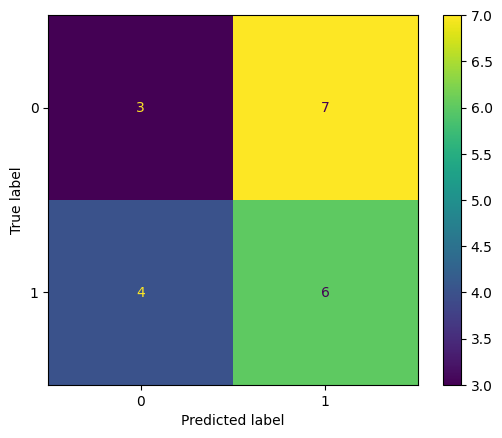

In [ ]:
cm = confusion_matrix(y_test, y_pred_gdc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
print("Test Accuracy for Gnb :",metrics.accuracy_score(y_test, y_pred_gnb)*100)
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred_gnb)}")
print(f"Precision = {metrics.precision_score(y_test, y_pred_gnb)}")
print(f"Recall = {metrics.recall_score(y_test, y_pred_gnb)}")
print(f"F1_Score = {metrics.f1_score(y_test, y_pred_gnb)}")

Test Accuracy for Gnb : 55.00000000000001
Accuracy = 0.55
Precision = 1.0
Recall = 0.1
F1_Score = 0.18181818181818182


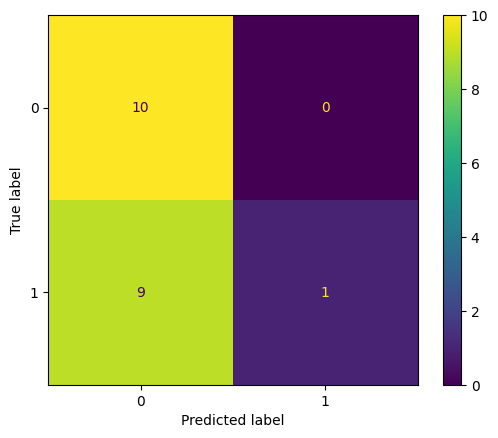

In [ ]:
cm = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

RF: AUROC = 0.490
LR: AUROC = 0.570
SVC: AUROC = 0.340
KNN: AUROC = 0.585
GDC: AUROC = 0.610
GNB: AUROC = 0.820


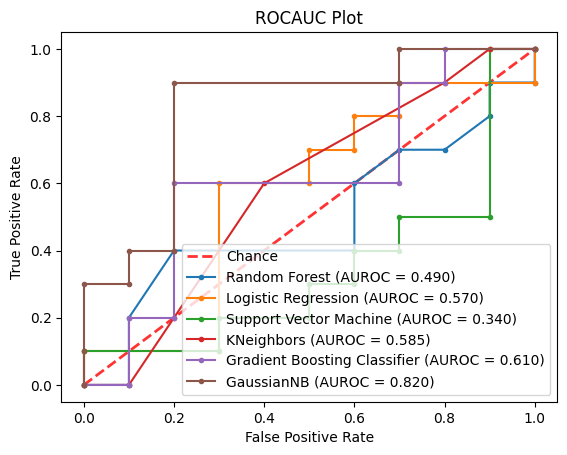

In [ ]:
#predicting probabilities
rf_probs = rf.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
gdc_probs = gdc.predict_proba(X_test)
gnb_probs = gnb.predict_proba(X_test)

rf_probs = rf_probs[:, 1]
lr_probs = lr_probs[:, 1]
svc_probs = svc_probs[:, 1]
knn_probs = knn_probs[:, 1]
gdc_probs = gdc_probs[:, 1]
gnb_probs = gnb_probs[:, 1]

#calclulate the rocauc score
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
gdc_auc = roc_auc_score(y_test, gdc_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)

print('RF: AUROC = %.3f' % (rf_auc))
print('LR: AUROC = %.3f' % (lr_auc))
print('SVC: AUROC = %.3f' % (svc_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('GDC: AUROC = %.3f' % (gdc_auc))
print('GNB: AUROC = %.3f' % (gnb_auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
gdc_fpr, gdc_tpr, _ = roc_curve(y_test, gdc_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)

plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(gdc_fpr, gdc_tpr, marker='.', label='Gradient Boosting Classifier (AUROC = %0.3f)' % gdc_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='GaussianNB (AUROC = %0.3f)' % gnb_auc)

# Title
plt.title('ROCAUC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()


In [ ]:
print("MCC RF: ",matthews_corrcoef(y_test,y_pred_rf)*100)
print("MCC SVC: ",matthews_corrcoef(y_test,y_pred_svc)*100)
print("MCC LR: ",matthews_corrcoef(y_test,y_pred_lr)*100)
print("KNN SVC: ",matthews_corrcoef(y_test,y_pred_kn)*100)
print("GBC SVC: ",matthews_corrcoef(y_test,y_pred_gdc)*100)
print("NGB SVC: ",matthews_corrcoef(y_test,y_pred_gnb)*100)

MCC RF:  0.0
MCC SVC:  31.448545101657547
MCC LR:  20.41241452319315
KNN SVC:  20.0
GBC SVC:  -10.482848367219184
NGB SVC:  22.941573387056174
